In [55]:
%matplotlib inline

import os 
import librosa
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt
import generate_global_features_2 as ggf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm, neighbors
from sklearn.naive_bayes import GaussianNB

importlib.reload(util)
importlib.reload(ggf)

<module 'generate_global_features_2' from '/Users/felipefelix/USP/tcc/code/generate_global_features_2.py'>

In [56]:
num_species      = 3
n_min_per_specie = 99

n_global = 4 # number of global functions
scoring  = 'f1_weighted'
song_or_call = 'song'

#data_dirs = util.choose_species(num_species)
#data_dirs = util.check_num_files(data_dirs, song_or_call, num_species, n_min_per_specie)
#print(data_dirs)

#data_dirs = ['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Batara cinerea/', 
#             '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Camptostoma obsoletum/', 
#             '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Myiodynastes maculatus/']

data_dirs = ['/Users/felipefelix/USP/tcc/dataset/pr_article/syllables/experimentos_100/Synallaxis spixi/', 
             '/Users/felipefelix/USP/tcc/dataset/pr_article/syllables/experimentos_100/Trogon surrucura/', 
             '/Users/felipefelix/USP/tcc/dataset/pr_article/syllables/experimentos_100/Vanellus chilensis/']

In [67]:
print(util.FEATURES)
feat = util.FEATURES[5]
feat1 = util.FEATURES[3]

labels_dict_o, labels_o, data_o = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = None)
labels_dict_f1, labels_f1, data_f1 = ggf.generate_global_features(n_global, feat1, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered1')
#labels_dict_f2, labels_f2, data_f2 = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered2')
#labels_dict_f3, labels_f3, data_f3 = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered3')

['rmse', 'mfcc', 'spec_band', 'spec_cent', 'spec_roll', 'syllable_dur']
403
403


/Users/felipefelix/USP/tcc/code/generate_global_features_2.py:36: UserWarning: loadtxt: Empty input file: "/Users/felipefelix/USP/tcc/dataset/pr_article/syllables/experimentos_100/Trogon surrucura/song/Trogon%20surrucura%20song-1.txt.syllable_dur.txt"
  feature = np.loadtxt(feature_path)
/Users/felipefelix/USP/tcc/code/generate_global_features_2.py:36: UserWarning: loadtxt: Empty input file: "/Users/felipefelix/USP/tcc/dataset/pr_article/syllables/experimentos_100/Trogon surrucura/song/Trogon%20surrucura%20song-2.txt.syllable_dur.txt"
  feature = np.loadtxt(feature_path)
/Users/felipefelix/USP/tcc/code/generate_global_features_2.py:36: UserWarning: loadtxt: Empty input file: "/Users/felipefelix/USP/tcc/dataset/pr_article/syllables/experimentos_100/Trogon surrucura/song/Trogon%20surrucura%20song-4.txt.syllable_dur.txt"
  feature = np.loadtxt(feature_path)
/Users/felipefelix/USP/tcc/code/generate_global_features_2.py:36: UserWarning: loadtxt: Empty input file: "/Users/felipefelix/USP/tcc

In [58]:

print(labels_dict_o)
# print(labels_dict_f1)
# print(labels_dict_f2)
# print(labels_dict_f3)


print(labels_o)
# print(labels_f1)
# print(labels_f2)
# print(labels_f3)


print(len(labels_o))
# print(len(labels_f1))
# print(len(labels_f2))
# print(len(labels_f3))


print(data_o[:10])
# print(data_f1[:10])
# print(data_f2[:10])
# print(data_f3[:10])

print(len(data_o))
# print(len(data_f1))
# print(len(data_f2))
# print(len(data_f3))


{'Synallaxis Spixi': 0, 'Trogon Surrucura': 1, 'Vanellus Chilensis': 2}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
403
[[ 0.48891912  0.11360455  0.630839    0.35274376]
 [ 0.45566569  0.24367246  0.68512472  0.07578231]
 [ 0

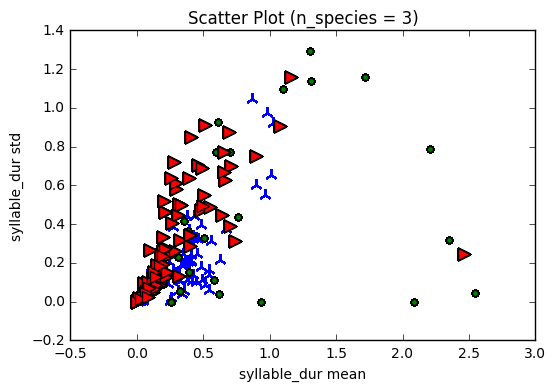

In [68]:
util.plot_scatter(data_o[:,0], data_o[:,1], labels_o, feat + ' mean', feat + ' std')

In [60]:
util.plot_scatter(data_f1[:,2], data_f1[:,3], labels_f1, feat + ' mean', feat + ' std')

NameError: name 'data_f1' is not defined

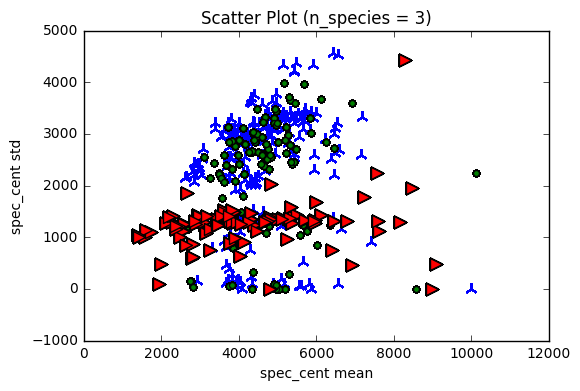

In [15]:
util.plot_scatter(data_f2[:,2], data_f2[:,3], labels_f2, feat + ' mean', feat + ' std')

In [63]:
def generate_scores(clf, clf_name, data, labels, scoring, cv = 5):
    scores  = cross_val_score(clf, data, labels, n_jobs = -1, cv = cv, scoring = scoring)
    print(scores)
    print('{0} - {1}: {2:.2f} (+/- {3:.2f})'.format(clf_name, scoring, scores.mean(), scores.std() * 2))


In [69]:
clf     = neighbors.KNeighborsClassifier(3, weights = 'uniform')

generate_scores(clf, 'kNN', data_o, labels_o, scoring)
generate_scores(clf, 'kNN', data_f1, labels_f1, scoring)
generate_scores(clf, 'kNN', data_f2, labels_f2, scoring)
generate_scores(clf, 'kNN', data_f3, labels_f3, scoring)

[ 0.66561411  0.65164043  0.81040626  0.64327376  0.65977984]
kNN - f1_weighted: 0.69 (+/- 0.13)


ValueError: Found input variables with inconsistent numbers of samples: [403, 0]

In [65]:
clf     = GaussianNB()

generate_scores(clf, 'gNB', data_o, labels_o, scoring)
generate_scores(clf, 'gNB', data_f1, labels_f1, scoring)
generate_scores(clf, 'gNB', data_f2, labels_f2, scoring)
generate_scores(clf, 'gNB', data_f3, labels_f3, scoring)

[ 0.4202589   0.49111951  0.46649946  0.45896359  0.50330446]
gNB - f1_weighted: 0.47 (+/- 0.06)


NameError: name 'data_f1' is not defined

In [66]:
clf = svm.SVC(kernel = 'linear', C = 1, decision_function_shape='ovr')

generate_scores(clf, 'SVM', data_o, labels_o, scoring)
generate_scores(clf, 'SVM', data_f1, labels_f1, scoring)
generate_scores(clf, 'SVM', data_f2, labels_f2, scoring)
generate_scores(clf, 'SVM', data_f3, labels_f3, scoring)


[ 0.39160087  0.46340616  0.4856916   0.42654817  0.53804088]
SVM - f1_weighted: 0.46 (+/- 0.10)


NameError: name 'data_f1' is not defined